In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display_markdown as mkdown # as print

In [2]:
def nl():
    print('\n')

def assemble_from_csvs(folder, cols):
    return [pd.read_csv(os.path.join(folder, fl), sep=",", header=None, names=cols) 
            for fl in os.listdir(folder)] # concatenate here! saves code

def assemble_from_csvs_train(folder, cols):
    return [pd.read_csv(os.path.join(folder, fl), 
                        dtype  = {'Semana' : 'int32',
                              'Agencia_ID' :'int32',
                              'Canal_ID' : 'int32',
                              'Ruta_SAK' : 'int32',
                              'Cliente-ID' : 'int64',
                              'Producto_ID':'int32',
                              'Venta_hoy':'float32',
                              'Venta_uni_hoy': 'int32',
                              'Dev_uni_proxima':'int32',
                              'Dev_proxima':'float32',
                              'Demanda_uni_equil':'int32'},
                        sep=",", header=None, names=cols) 
            for fl in os.listdir(folder)] # concatenate here! saves code


# Uploadig Test data

In [41]:
test_folder = "C:/Users/xians/Desktop/Kaggle/Bimbo/data/test"
test_cols = ['id','WeekNum','Sales_Depot_ID','Sales_Channel_ID','Route_ID','Client_ID','Product_ID']
test_list = assemble_from_csvs(test_folder, test_cols)
test_df = pd.concat(test_list, axis=0, ignore_index=True)

In [42]:
test_df.head()

,id,WeekNum,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [ ]:
test_df = test_df.sort_values(by = 'id')
test_df.reset_index(drop=True, inplace=True)

In [ ]:
test_df.head()

In [ ]:
pd.options.display.float_format = '{0:.2f}'.format

In [ ]:
test_df.describe()

# Uploading Training Data

In [3]:
train_folder = "C:/Users/xians/Desktop/Kaggle/Bimbo/data/train/"
train_cols = ['WeekNum','Sales_Depot_ID','Sales_Channel_ID','Route_ID','Client_ID','Product_ID','Sales_unit_this_week','Sales_this_week','Returns_unit_next_week','Returns_next_week','Adjusted_Demand']
train_list = assemble_from_csvs_train(train_folder, train_cols)

In [4]:
l = len(train_list)
print l

15


In [5]:
train_df = pd.concat(train_list[:5], axis=0, ignore_index=True)

In [6]:
train_df.head()

,WeekNum,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Sales_unit_this_week,Sales_this_week,Returns_unit_next_week,Returns_next_week,Adjusted_Demand
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


In [7]:
pd.options.display.float_format = '{0:.2f}'.format

In [8]:
train_df.describe()

,WeekNum,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Sales_unit_this_week,Sales_this_week,Returns_unit_next_week,Returns_next_week,Adjusted_Demand
count,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00,24999999.00
mean,6.71,2334.78,1.39,2092.20,1783540.01,21024.57,7.33,68.61,0.13,1.26,7.24
std,1.93,3774.89,1.46,1477.50,2158704.99,18760.07,21.91,328.42,3.74,34.26,21.68
min,3.00,1110.00,1.00,1.00,26.00,41.00,0.00,0.00,0.00,0.00,0.00
25%,7.00,1239.00,1.00,1158.00,352103.00,1242.00,2.00,16.76,0.00,0.00,2.00
50%,7.00,1461.00,1.00,1286.00,1171363.00,30549.00,3.00,30.02,0.00,0.00,3.00
75%,8.00,2017.00,1.00,2182.00,2357980.00,40217.00,7.00,56.94,0.00,0.00,7.00
max,9.00,25759.00,11.00,9991.00,2015152015.00,49997.00,7200.00,382694.40,9765.00,93744.00,5000.00


# tell the notebook server to render charts inline

In [10]:
%matplotlib inline

{'boxes': [<matplotlib.lines.Line2D at 0x427f0978>],
 'caps': [<matplotlib.lines.Line2D at 0x428015f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x49b916a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x49b91128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x427f0a58>,
  <matplotlib.lines.Line2D at 0x42801080>]}

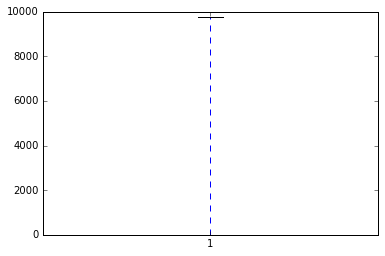

In [15]:
plt.boxplot(train_df.Returns_unit_next_week)

In [16]:
train_df.isnull().sum()

WeekNum                   0
Sales_Depot_ID            0
Sales_Channel_ID          0
Route_ID                  0
Client_ID                 0
Product_ID                0
Sales_unit_this_week      0
Sales_this_week           0
Returns_unit_next_week    0
Returns_next_week         0
Adjusted_Demand           0
dtype: int64

In [ ]:
plt.figure()
plt.boxplot(train_df.Adjusted_Demand, 1)

In [18]:
def label_plot(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

In [23]:
target = train_df['Sales_unit_this_week'].tolist()

In [21]:
len(target)

24999999

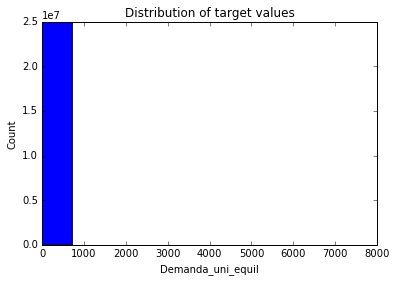

In [25]:
plt.hist(target, bins=10, color='blue')
label_plot('Distribution of target values', 'Demanda_uni_equil', 'Count')

In [ ]:
plt.show()

In [33]:
client_df = pd.read_csv("C:/Users/xians/Desktop/Kaggle/Bimbo/data/cliente_tabla.csv",sep=",") 
table1 = pd.merge(train_df,client_df, on = ['Client_ID'])
del client_df, train_df

In [35]:
product_df = pd.read_csv("C:/Users/xians/Desktop/Kaggle/Bimbo/data/producto_tabla.csv",sep=",")
table2 = pd.merge(table1,product_df, on = ['Product_ID']) 
del table1, product_df

In [37]:
town_df = pd.read_csv("C:/Users/xians/Desktop/Kaggle/Bimbo/data/town_state.csv",sep=",")
ResultTable = pd.merge(table2,town_df, on = ['Sales_Depot_ID']) 
del table2, town_df

In [44]:
ResultTable.head()

In [ ]:
import xgboost as xgb